In [48]:
# importing
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
#from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

           Elevation         Aspect          Slope  \
count  581012.000000  581012.000000  581012.000000   
mean     2959.365301     155.656807      14.103704   
std       279.984734     111.913721       7.488242   
min      1859.000000       0.000000       0.000000   
25%      2809.000000      58.000000       9.000000   
50%      2996.000000     127.000000      13.000000   
75%      3163.000000     260.000000      18.000000   
max      3858.000000     360.000000      66.000000   

       Horizontal_Distance_To_Hydrology  Vertical_Distance_To_Hydrology  \
count                     581012.000000                   581012.000000   
mean                         269.428217                       46.418855   
std                          212.549356                       58.295232   
min                            0.000000                     -173.000000   
25%                          108.000000                        7.000000   
50%                          218.000000                       3

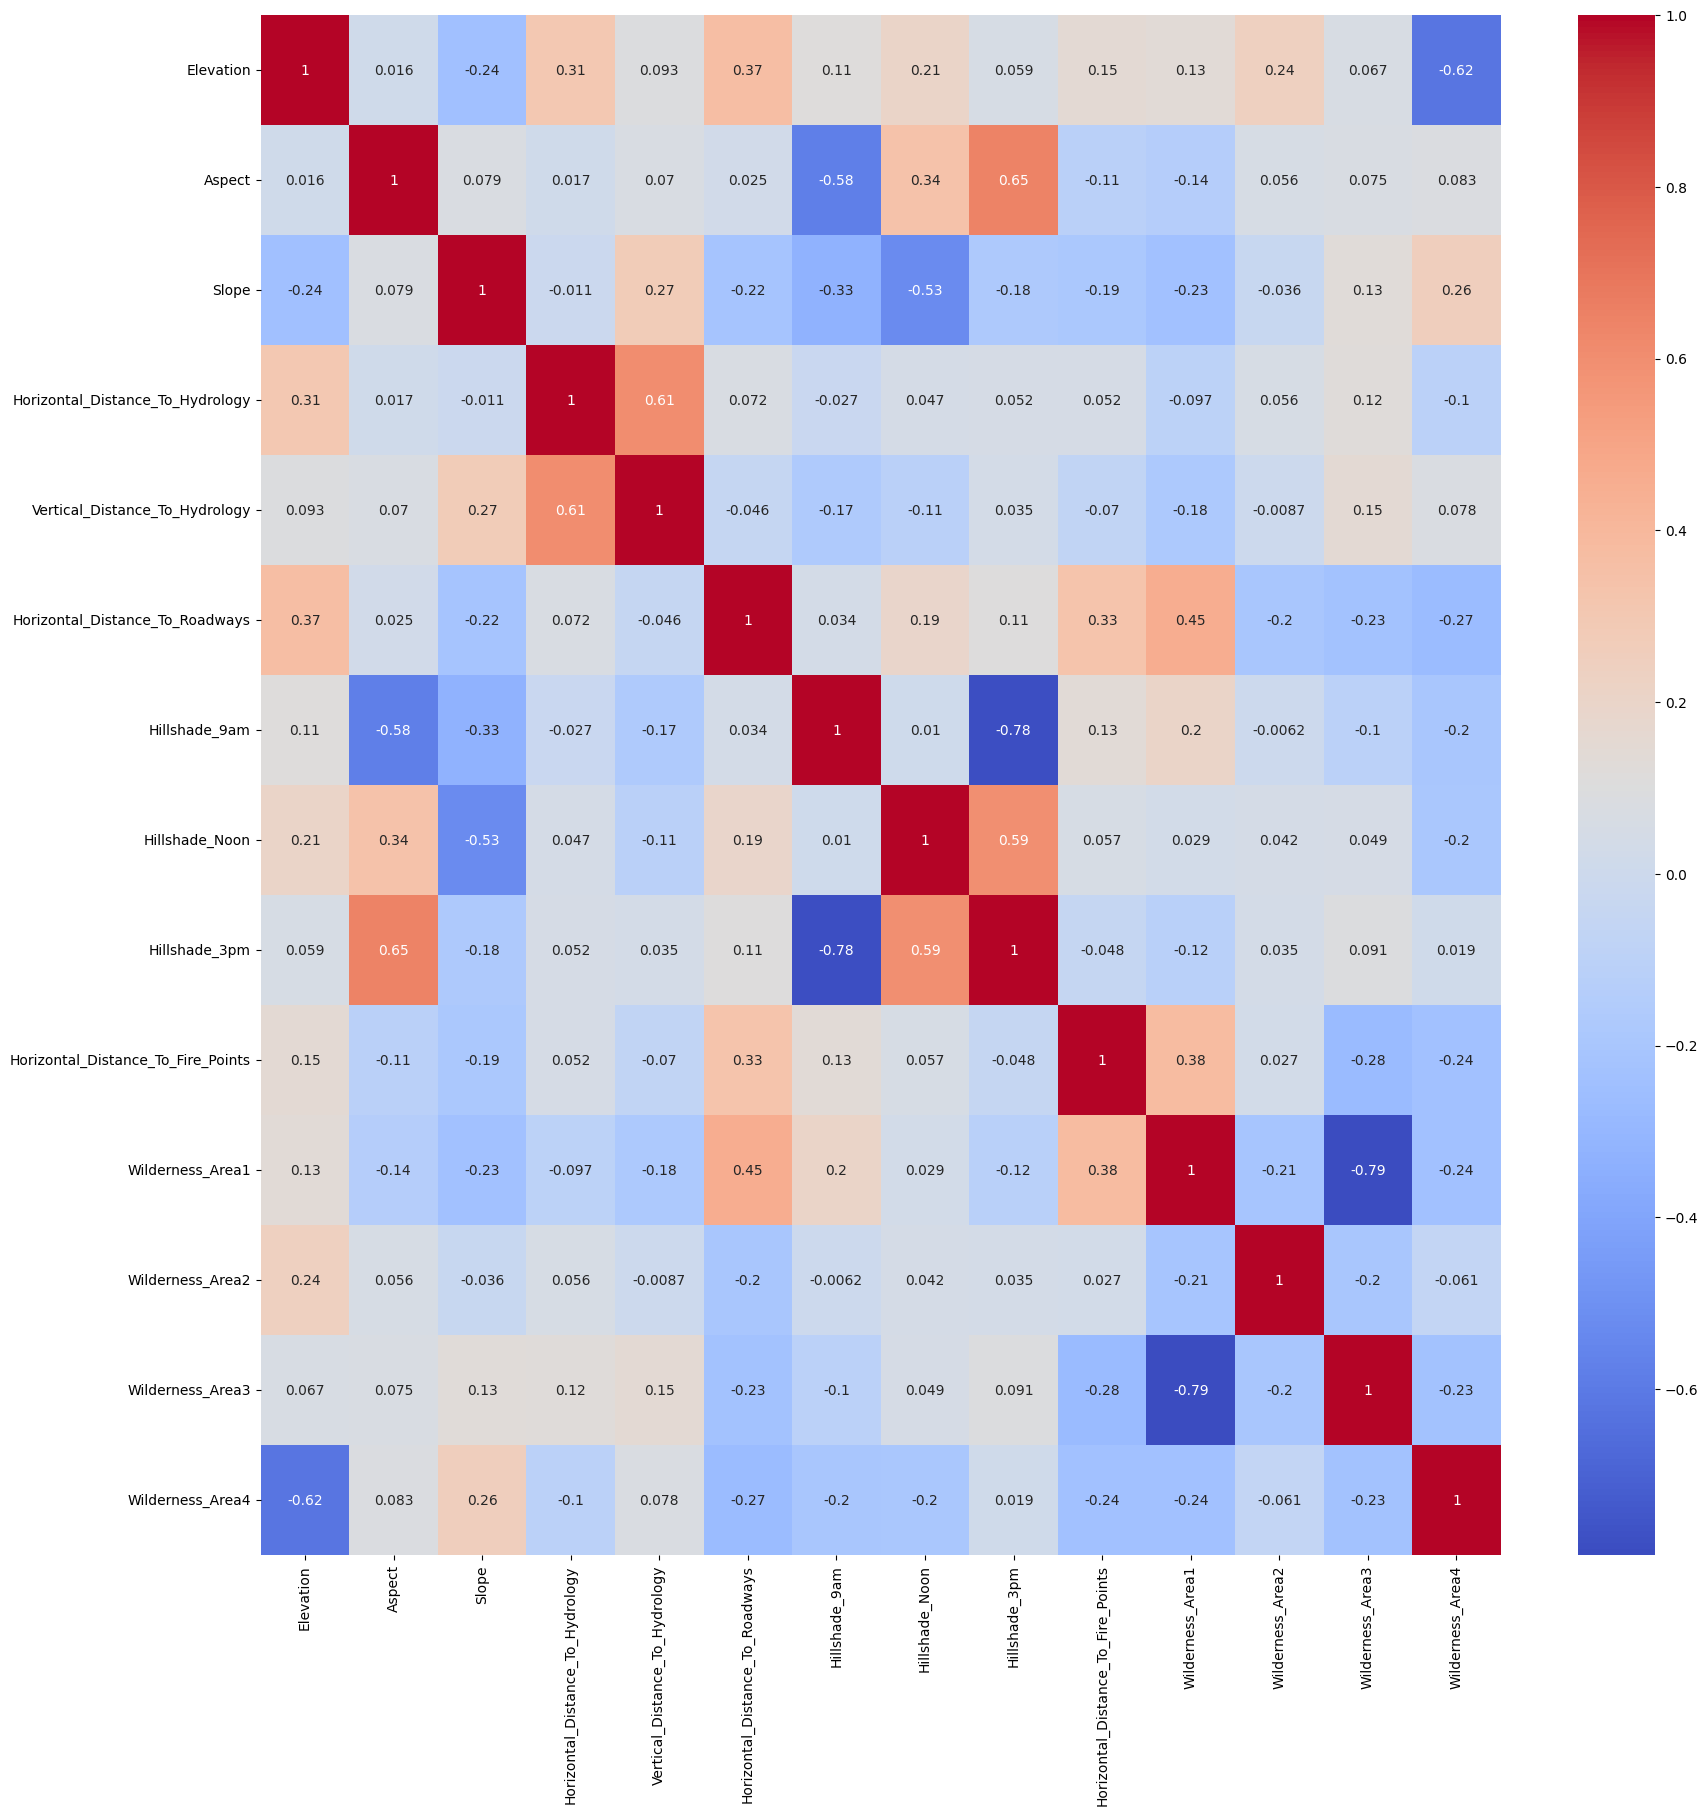

[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]


In [49]:
# load df
df = pd.read_csv('cover_data.csv')
#print(df.head())
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
print(X.describe())
# .info shows that there are no nan characters
print(X.info())
counter = Counter(y)
total = len(y)
percentage = {key: (value/total) * 100 for key, value in counter.items()}
# prints the distribution of cover types from 1 to 7
print(percentage)
corr = X.iloc[:, :14].corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()
plt.close()
y = y - 1
y = to_categorical(y, num_classes=7)
print(y)
# found out that hillshade_9am and hillshade_3pm is pretty correlated which makes sense...

In [50]:
# split the data into training, validation and testing set
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)
X_train, X_val ,y_train, y_val = train_test_split(X_temp, y_temp, test_size = 0.3, random_state=1)
model = Sequential()
model.add(InputLayer(input_shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(7, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.01), metrics=['accuracy'])
model.fit(X_train, y_train, epochs=30, batch_size=50, verbose=1)

Epoch 1/30


/Users/wangzhenghua/Downloads/dlsp-portfolio-starter-code/.venv/lib/python3.9/site-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


6508/6508 ━━━━━━━━━━━━━━━━━━━━ 3s 362us/step - accuracy: 0.5690 - loss: 11.3760
Epoch 2/30
6508/6508 ━━━━━━━━━━━━━━━━━━━━ 2s 361us/step - accuracy: 0.6452 - loss: 0.8434
Epoch 3/30
6508/6508 ━━━━━━━━━━━━━━━━━━━━ 3s 409us/step - accuracy: 0.6582 - loss: 0.8007
Epoch 4/30
6508/6508 ━━━━━━━━━━━━━━━━━━━━ 3s 389us/step - accuracy: 0.6625 - loss: 0.7928
Epoch 5/30
6508/6508 ━━━━━━━━━━━━━━━━━━━━ 3s 385us/step - accuracy: 0.6640 - loss: 0.7842
Epoch 6/30
6508/6508 ━━━━━━━━━━━━━━━━━━━━ 2s 381us/step - accuracy: 0.6655 - loss: 0.7833
Epoch 7/30
6508/6508 ━━━━━━━━━━━━━━━━━━━━ 3s 386us/step - accuracy: 0.6666 - loss: 0.7835
Epoch 8/30
6508/6508 ━━━━━━━━━━━━━━━━━━━━ 3s 402us/step - accuracy: 0.6673 - loss: 0.7820
Epoch 9/30
6508/6508 ━━━━━━━━━━━━━━━━━━━━ 3s 397us/step - accuracy: 0.6690 - loss: 0.7802
Epoch 10/30
6508/6508 ━━━━━━━━━━━━━━━━━━━━ 3s 408us/step - accuracy: 0.6694 - loss: 0.7750
Epoch 11/30
6508/6508 ━━━━━━━━━━━━━━━━━━━━ 3s 407us/step - accuracy: 0.6686 - loss: 0.7811
Epoch 12/30
6508/6

In [51]:
#def grid_search():
    #batch_size = [10, 30, 50]
    #epochs = [10, 30, 60]
    #learning_rate = [0.01, 0.1, 1]
    #param_grid = dict(batch_size = batch_size, epochs = epochs, learning_rate = learning_rate)
    #grid = GridSearchCV(estimator = model, param_grid=param_grid, scoring=make)
# unable to install 'KerasClassifier' :/

In [63]:
from sklearn.metrics import confusion_matrix

# Convert y_test to one-hot encoding if it's in integer form
y_test_one_hot = to_categorical(y_test, num_classes=7)

# Evaluate the model on test data
loss, acc = model.evaluate(X_test, y_test_one_hot)
print(f'loss is {loss}, accuracy is {acc}')
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_test_class = np.argmax(y_test_one_hot, axis=1)
print(classification_report(y_test_class, y_pred))

# confusion matrix
cm = confusion_matrix(y_test_class, y_pred)
print(cm)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Greens')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


ValueError: Arguments `target` and `output` must have the same rank (ndim). Received: target.shape=(None, 7, 7), output.shape=(None, 7)

In [64]:
from tensorflow.keras.utils import to_categorical

# Ensure y_test is one-hot encoded correctly
y_test_one_hot = to_categorical(y_test, num_classes=7)
y_test_one_hot = np.squeeze(y_test_one_hot)
print(y_test_one_hot.shape)
# Now, evaluate the model with the properly shaped one-hot encoded labels
loss, acc = model.evaluate(X_test, y_test_one_hot)
print(f'loss is {loss}, accuracy is {acc}')

# Predicting the labels
y_pred = model.predict(X_test)

# Convert predictions back to class labels
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_test_one_hot, axis=1)

# Print classification report and confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print(cm)



(116203, 7, 7)


ValueError: Arguments `target` and `output` must have the same rank (ndim). Received: target.shape=(None, 7, 7), output.shape=(None, 7)